# **Analyzing the factors that affect student dropout rates in post-secondary institutions**

**Dataset:** I will be using the *Predict Students' Dropout and Academic Success* dataset which is available for free on Kaggle. It includes demographic data, social-economic factors and academic performance information of students enrolled in various undergraduate degrees offered at a higher education institution.

**Aim**: Using predictive analysis to gain insights into what specific factors affect student dropout rates in post-secondary institutions.

This analysis can provide critical information or administrators on formulating strategies that promote successful degree completion among students from diverse backgrounds in their institutions.

# Data Loading & Preprocessing

**Importing Required Libraries**

Essential libraries such as Pandas and NumPy are imported for data manipulation, while Matplotlib and Seaborn are used for data visualization. These libraries offer a broad range of functions that simplify data analysis and the graphical representation of data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading and Initial Exploration of the Dataset**

Displaying the first few rows of the dataset to get a snapshot of the available data, facilitating an initial qualitative assessment. This step is essential for understanding the dataset's structure and informing the direction of the analysis.

In [4]:
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
df.rename(columns={'Nacionality':'Nationality','Target': 'Student Status'}, inplace=True)

In [6]:
# Looking at the number of rows and columns in the dataset
df.shape

(4424, 35)

In [7]:
# Looking at the data types of each columns and non-null value count in each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

From this we see that the "Student Status" column has object type values, which means it is categorical data. We will later convert this categorical data to numerical values to facilitate better predictions.

In [8]:
# Identifying null values in the dataset to see if it needs further cleaning
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

Thus, it looks like there are no missing values in the dataset that we might need to handle.

**Encoding Categorical Variables**

Transforming categorical variables into a numerical format to enable the model to interpret these variables.

In [9]:
# Looking at what different categories the Student Status is divided into
print(df["Student Status"].unique())

['Dropout' 'Graduate' 'Enrolled']


In [10]:
# Transforming 'Student Status' values into numerical format
df["Student Status"] = df["Student Status"].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

In [11]:
print(df["Student Status"].unique())

[0 2 1]


# Correlational Analysis

Calculating the **Pearson correlation coefficients** between "Student Status" and all other columns in the dataframe. These Pearson coeeficient describes the linear relationship between two variables. Correlations close to 0 imply little to no linear relationship.

However, it's important to note that correlation does not imply causation, and non-linear relationships are not captured by Pearson's correlation.

In [12]:
df.corr()['Student Status']

,Student Status
Marital status,-0.089804
Application mode,-0.212025
Application order,0.089791
Course,0.007841
Daytime/evening attendance,0.075107
Previous qualification,-0.091365
Nationality,-0.004740
Mother's qualification,-0.038346
Father's qualification,0.000329
Mother's occupation,0.048424


We will use **Spearman's rank correlation** to explore non-linear relationships between features and the target variable.

In [13]:
spearman_corr = df.corr(method='spearman')['Student Status']
print(spearman_corr.sort_values(ascending=False))

Student Status                                    1.000000
Curricular units 2nd sem (approved)               0.654049
Curricular units 1st sem (approved)               0.594194
Curricular units 2nd sem (grade)                  0.559820
Curricular units 1st sem (grade)                  0.497341
Tuition fees up to date                           0.400283
Scholarship holder                                0.301103
Curricular units 2nd sem (enrolled)               0.241456
Curricular units 1st sem (enrolled)               0.230576
Displaced                                         0.113241
Application order                                 0.102185
Daytime/evening attendance                        0.073066
GDP                                               0.053497
Curricular units 2nd sem (credited)               0.035004
Mother's occupation                               0.032700
Father's occupation                               0.032265
Curricular units 2nd sem (evaluations)            0.0284

# Cleaning the Dataset & Feature Engineering

Based on our correlational analysis we see that some of the columns have almost no correlation with the Student Status. Hence, we remove these columns from our dataset to endure that our model focuses only on the meaningful attributes that directly impact academic status.

In statistical analysis, a correlation coefficient between -0.05 and 0.05 suggests a weak relationship between the variables. Thus, we will drop any columns that show correlation coefficients between -0.05 and 0.05 from both the Spearman and Pearson correlation analyses.

In [14]:
df = df.drop(columns=['GDP', 'Mother\'s occupation', 'Father\'s occupation',
                      'Father\'s qualification', 'Curricular units 1st sem (credited)',
                      'Unemployment rate', 'Course', 'International', 'Nationality',
                      'Educational special needs', 'Mother\'s qualification',
                      'Inflation rate', 'Curricular units 1st sem (evaluations)'], axis=1)

In [15]:
df.head()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Student Status
0,1,8,5,1,1,1,0,1,1,0,...,0,0.000000,0,0,0,0,0,0.000000,0,0
1,1,6,1,1,1,1,0,0,1,0,...,6,14.000000,0,0,6,6,6,13.666667,0,2
2,1,1,5,1,1,1,0,0,1,0,...,0,0.000000,0,0,6,0,0,0.000000,0,0
3,1,8,2,1,1,1,0,1,0,0,...,6,13.428571,0,0,6,10,5,12.400000,0,2
4,2,12,1,0,1,0,0,1,0,0,...,5,12.333333,0,0,6,6,6,13.000000,0,2


We had 35 columns earlier, which is now 22. We will focus on these features in or further analysis.



---



**Feature Engineering**

The core objective of feature engineering is to transform the existing data into more meaningful predictors that can increase the accuracy of the model. Interaction features are particularly useful to capture the combined effect of two or more variables, while aggregated features can provide a higher-level summary of the student's academic trajectory.

In [16]:
# Creating interaction features for academic performance
df['Interaction_CU_1st_2nd_Approved'] = df['Curricular units 1st sem (approved)'] * df['Curricular units 2nd sem (approved)']
df['Interaction_CU_1st_2nd_Grade'] = df['Curricular units 1st sem (grade)'] * df['Curricular units 2nd sem (grade)']

# Creating aggregated features
df['Total_CU_Approved'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']
df['Total_CU_Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Dropping the original features to reduce multi-collinearity
columns_to_drop = ['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                   'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',]
df.drop(columns_to_drop, axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

Visualizing trends, patterns, anomalies, and correlations in the data through statistical analysis. This examination of data will help us in identifying the significant predictors of student status, guiding subsequent modeling efforts with informed decisions.



---



**Understanding the Proportions of Graduates, Enrollments, and Dropouts**

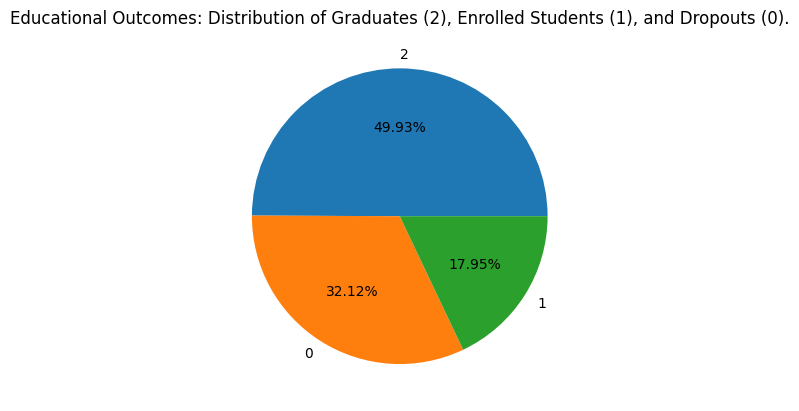

In [17]:
# Visualizing the distribution of Graduates vs. Dropouts vs. Enrolled to understand the performance baseline

categories_count = df['Student Status'].value_counts()
plt.pie(categories_count.values, labels=categories_count.index, autopct='%1.2f%%')

plt.title('Educational Outcomes: Distribution of Graduates (2), Enrolled Students (1), and Dropouts (0).')
plt.show()

This reveals that about 32.1% of students droupout of post-secondary institutions, which is a significantly high number.

# Comprehensive Analysis of Predictors Influencing Student Status

In this section, we perform an exhaustive analysis of a variety of factors to understand their influence on Student Status:

1.   A correlation matrix heatmap that elucidates the intricate relationships between different variables.

2.   A bar graph of the top 10 features with the highest correlation to Student Status to identify the most significant predictors.

3.   A Factors Ranker heatmap ranks these features providing for an ordered visualization.



---



**Correlation matrix heatmap**

The heatmap's correlation matrix provides a detailed view into the relationships between various factors and their impact on Student Status.

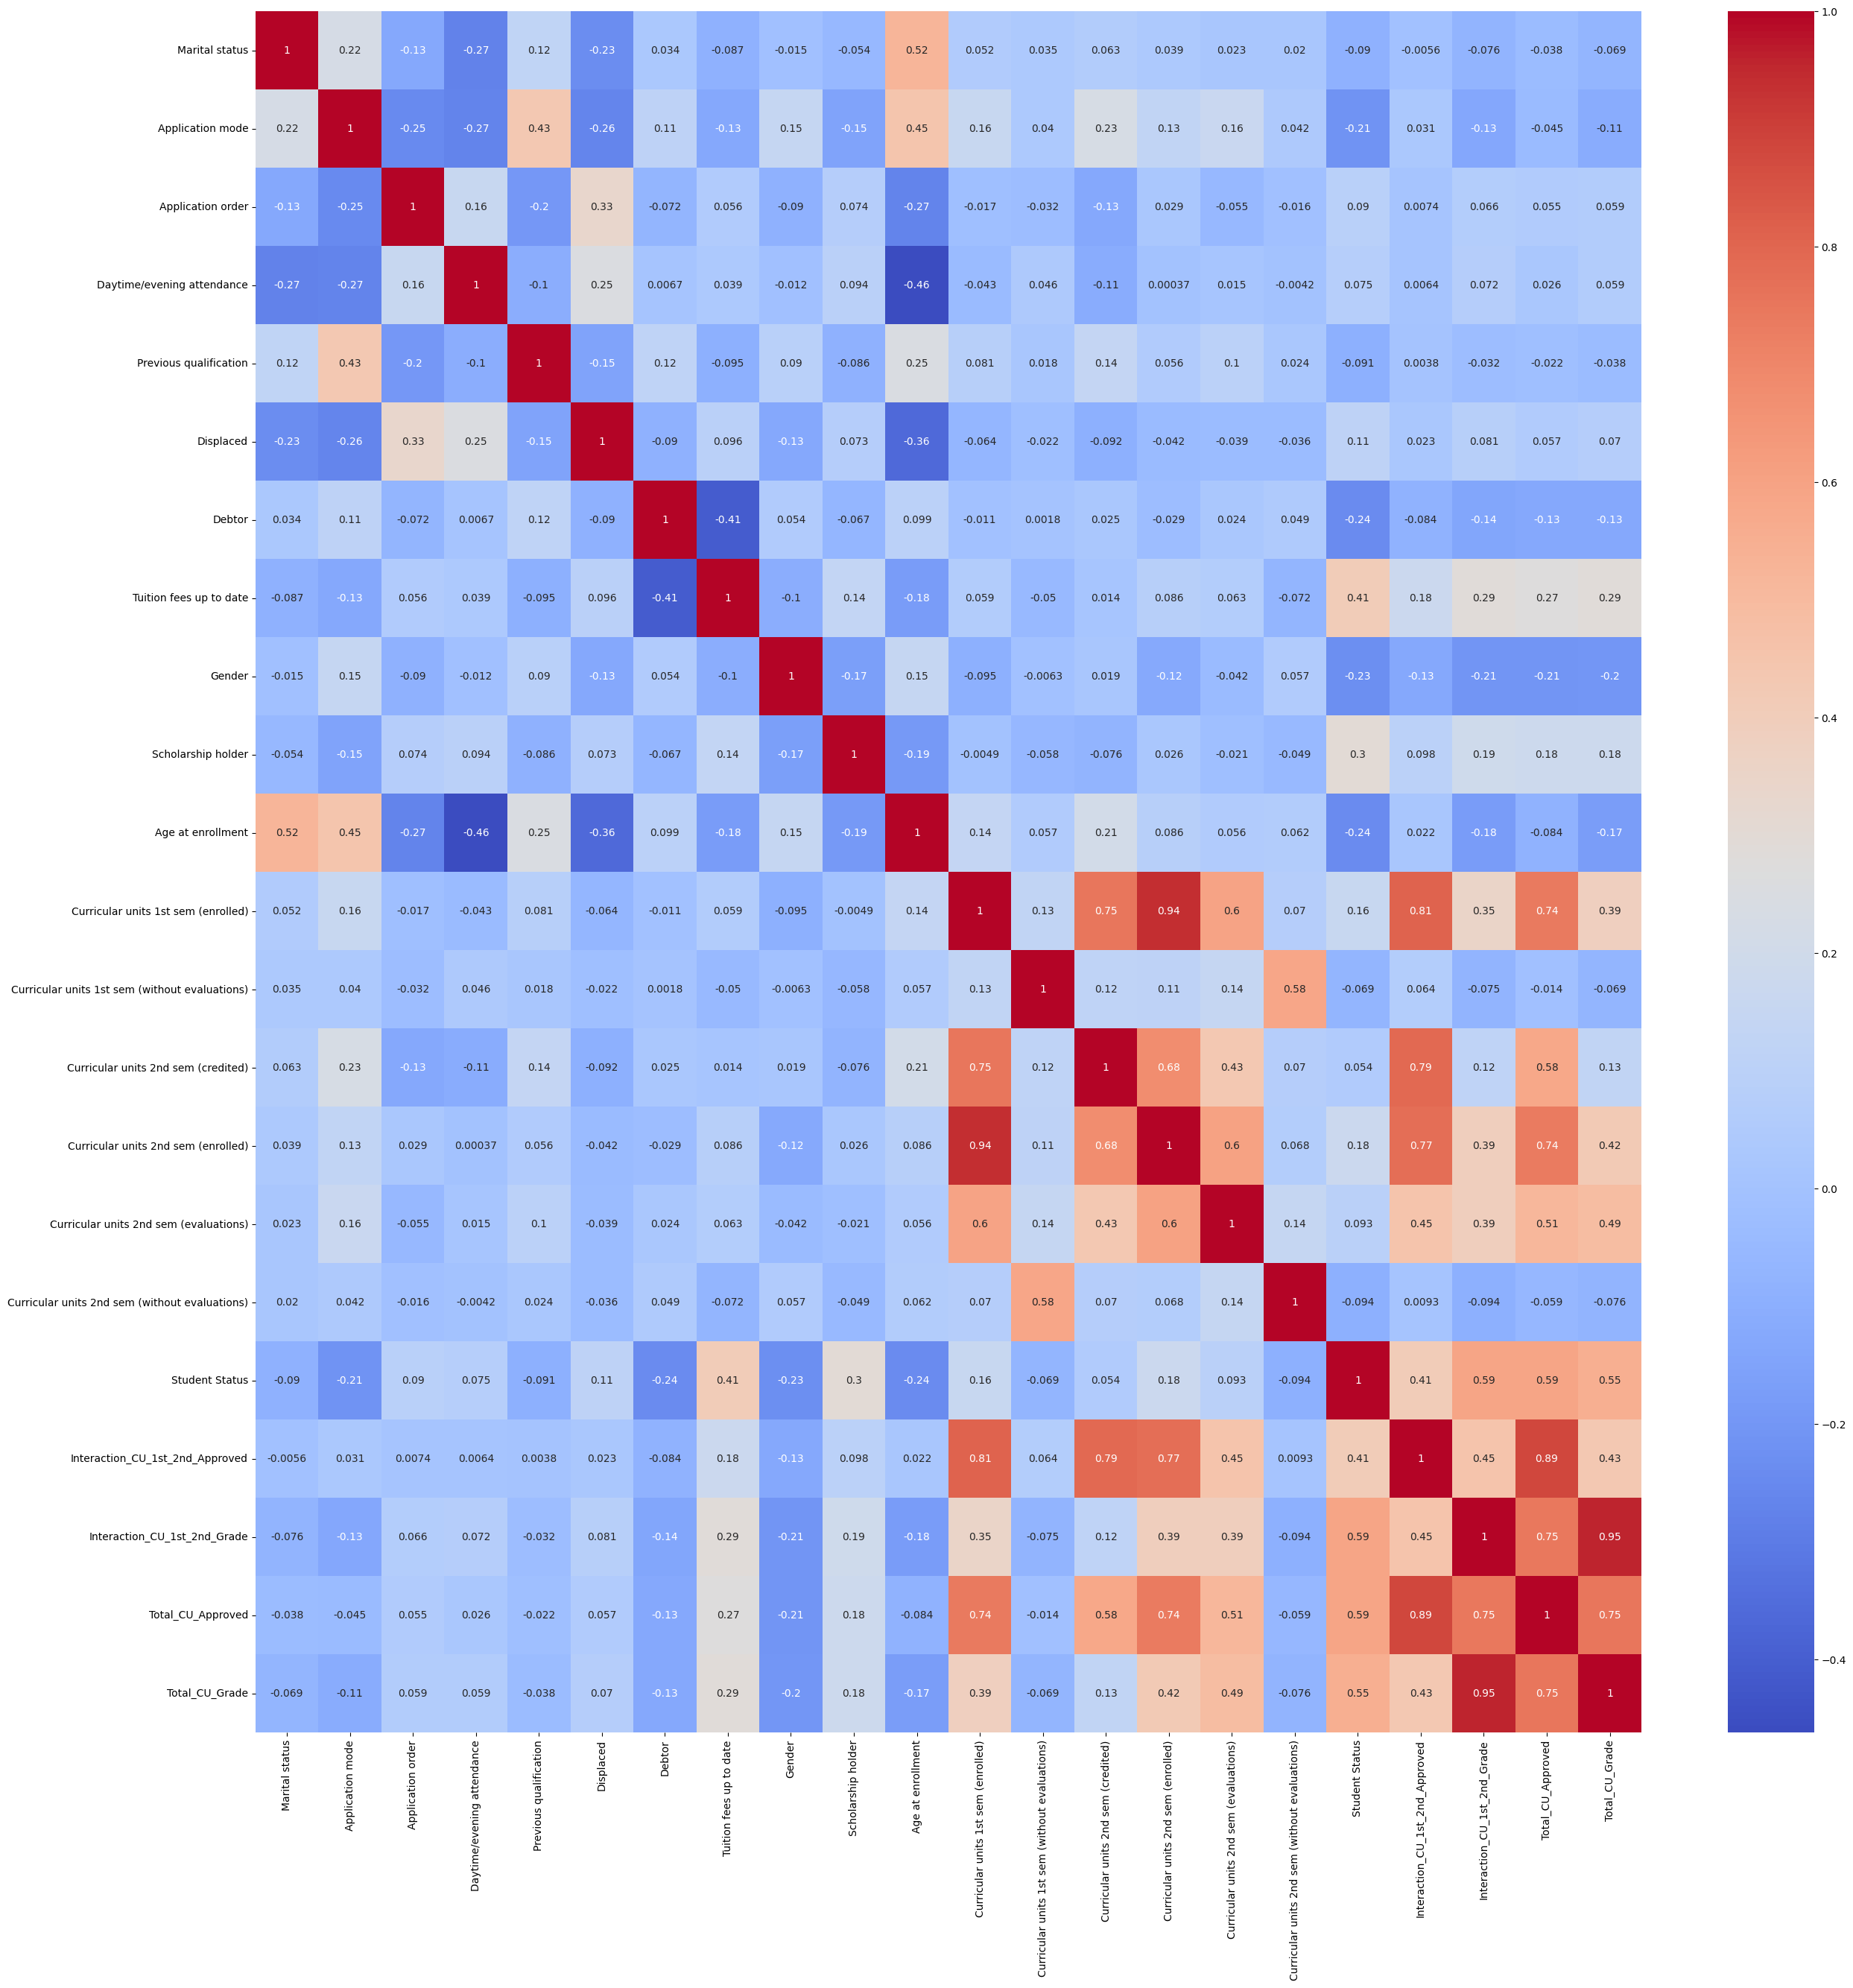

In [18]:
plt.figure(figsize=(30,30))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

From this visualization, we can see that the total number of Curricular Units approved displays a strong positive correlation, suggesting that successful course completion is indicative of positive student status. In contrast, a negative correlation between factors such as Age at Enrollment and Student Status indicates a tendency where older enrolment age could negatively affect the student's academic standing.

Despite these patterns, the complex interplay of numerous variables within this high-dimensional dataset makes isolating specific predictors for Student Status challenging.



---



**Identifying the Most Significant Predictos for Student Success**

This section presents a statistical analysis aimed at pinpointing the top 10 features that are most strongly correlated with Student Status. By calculating the correlation of all features with Student Status and selecting the ten with the highest absolute values, we derive a clear ranking. The resulting bar chart visualizes these relationships, providing a straightforward depiction of which factors are most influential in determining Student Status

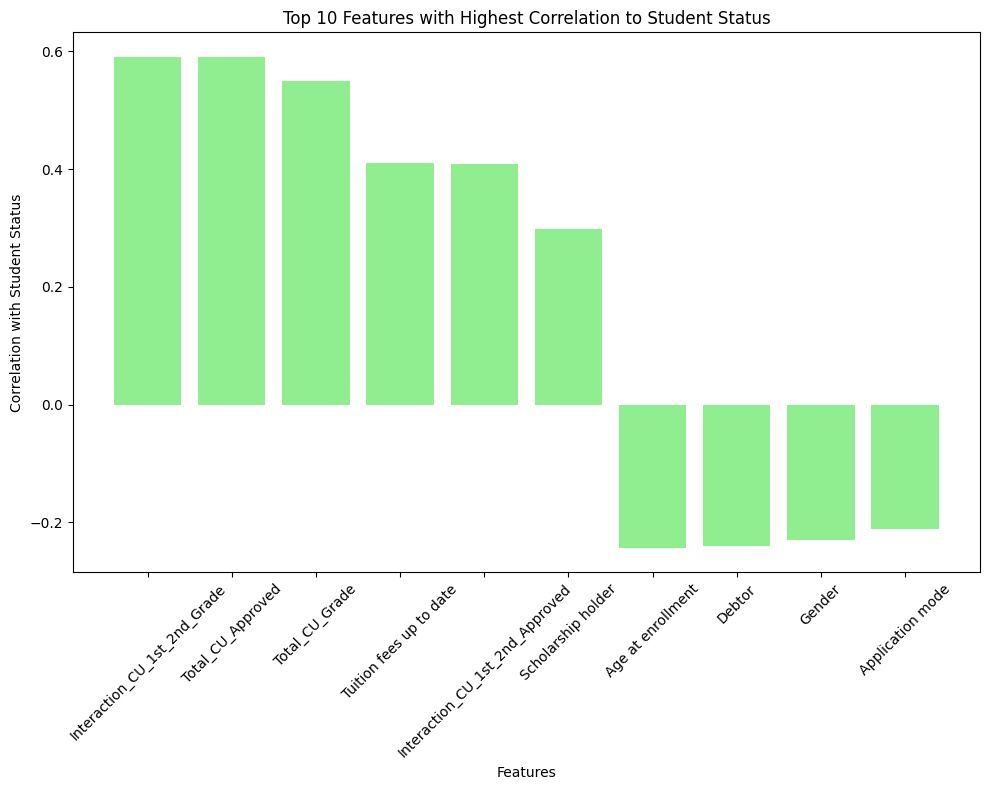

In [19]:
correlations = df.corr()['Student Status'].drop('Student Status')

top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

# Plotting the values using a bar chart
plt.figure(figsize=(10,8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='lightgreen')

plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')

plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



---



**Factors Ranker Visualization**

 It ranks these features by their correlation strength, from the highest to the lowest. This ranking is crucial for identifying which variables most significantly affect Student Status.

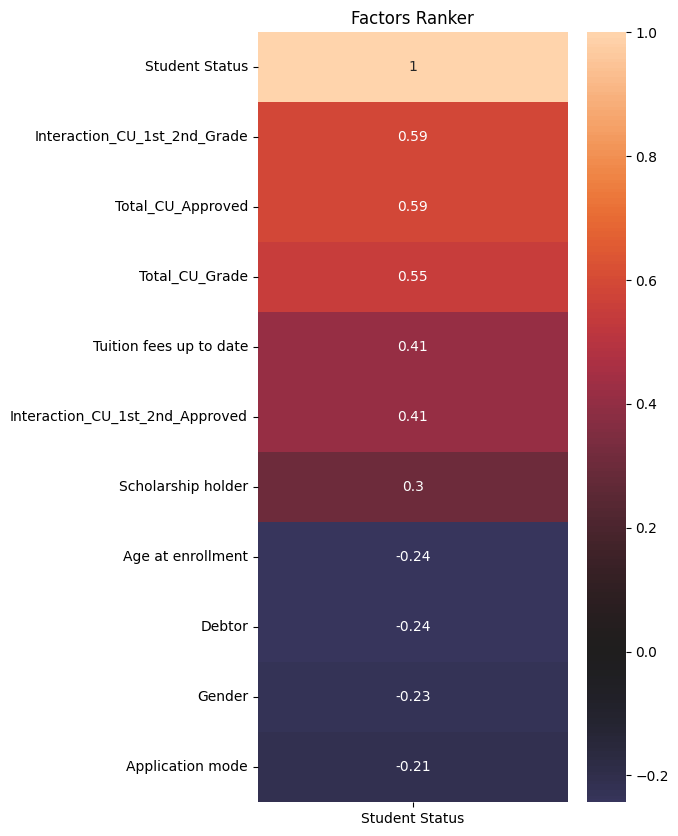

In [20]:
# Creating a new DataFrame with only the top 10 features and 'Student Status'

top_10_df = df[top_10_features.to_list() + ['Student Status']].copy()
# top_10_df.head()

top_10_corr = top_10_df.corr()[['Student Status']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Student Status', key=lambda x: abs(x), ascending=False)

plt.figure(figsize=(5,10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()

Now that we have analyzed the various factors that affect student status the most, we will look at all these features separately to understand how they affect a studentès status



---



**Impact of Interaction Between 1st and 2nd Semester Grades on Student Status**

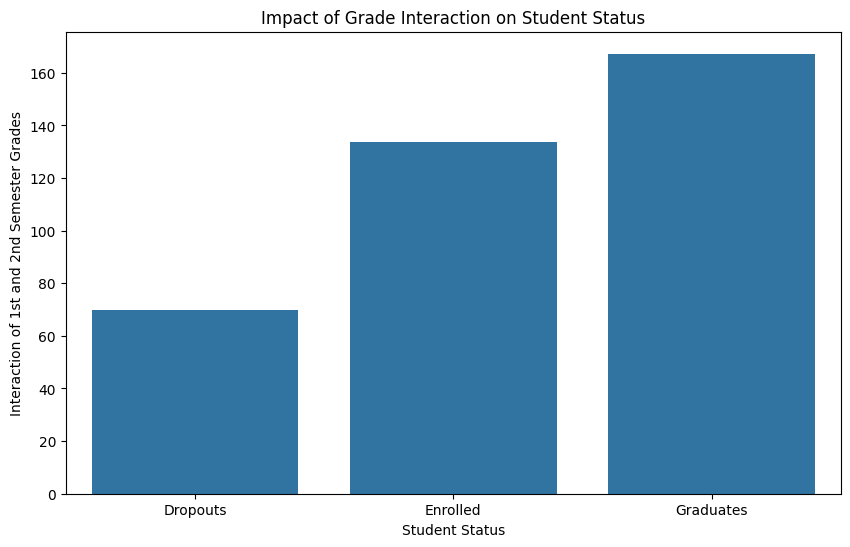

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Status', y='Interaction_CU_1st_2nd_Grade', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Interaction of 1st and 2nd Semester Grades')
plt.title('Impact of Grade Interaction on Student Status')
plt.show()

This bar chart clearly demonstrates a positive relation between a student's combined performance over two semesters and their likelihood of graduating.

**Impact of Total Approved Curricular Units on Student Status**

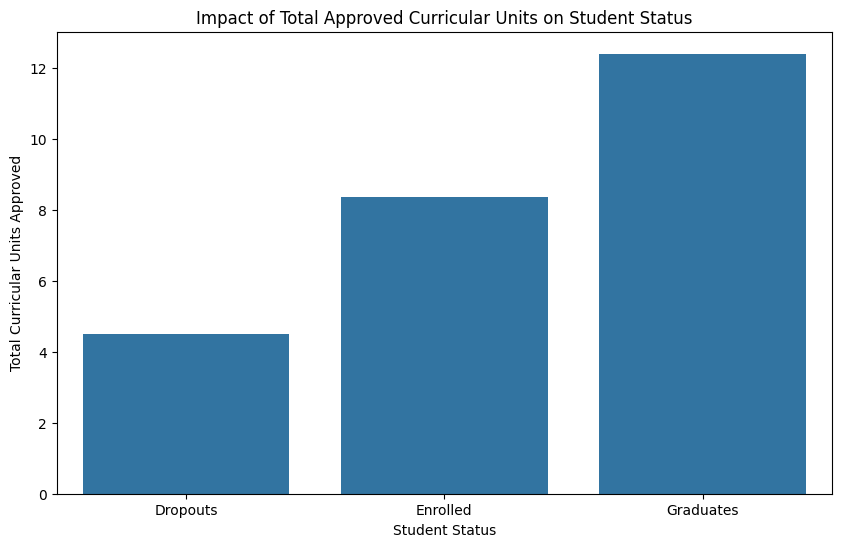

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Status', y='Total_CU_Approved', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Total Curricular Units Approved')
plt.title('Impact of Total Approved Curricular Units on Student Status')
plt.show()

The second chart shows the effect of the aggregated measure of curricular units approved in both semesters. Similar to the interaction feature, this aggregated measure is predictive of a student's ability to graduate.

**Understanding the Role of Financial Status in Educational Success**



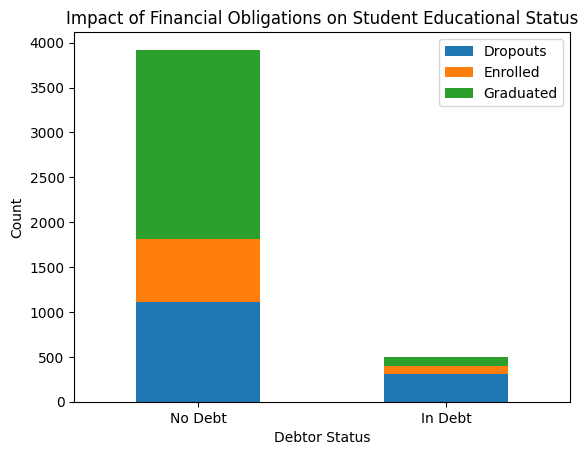

In [25]:
# Mapping Student Status numerical labels to descriptive labels for the legend
student_status_labels = {0: 'Dropouts', 1: 'Enrolled', 2: 'Graduated'}

# Mapping numerical labels to descriptive labels for Debtor status
debtor_status_labels = {0: 'No Debt', 1: 'In Debt'}

# Visualizing the impact of student debt on educational status
grouped = df.groupby(['Debtor', 'Student Status']).size().unstack()
grouped.rename(index=debtor_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Debtor Status')
plt.ylabel('Count')
plt.title('Impact of Financial Obligations on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

The proportion of students who drop out is noticeably larger within the indebted group, suggesting a detrimental effect of financial obligations on educational continuity.

**Assesing the Impact of Scholarship and Financial Support to Student Success**

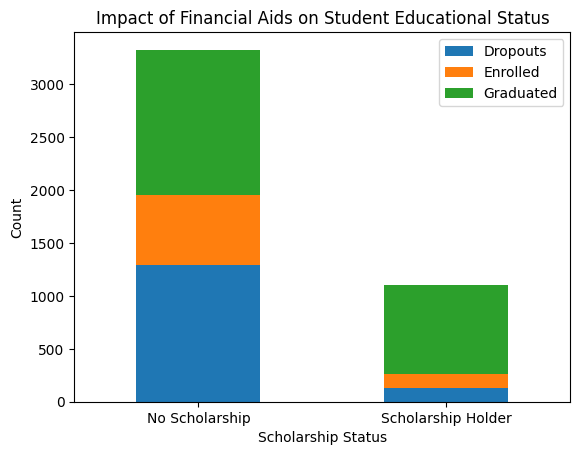

In [26]:
# Mapping numerical labels to descriptive labels for Scholarship status
scholarship_status_labels = {0: 'No Scholarship', 1: 'Scholarship Holder'}

# Visualizing the impact of scholarships on educational status
grouped = df.groupby(['Scholarship holder', 'Student Status']).size().unstack()
grouped.rename(index=scholarship_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Scholarship Status')
plt.ylabel('Count')
plt.title('Impact of Financial Aids on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

The distribution clearly shows a majority of scholarship recipients graduating, which could indicate that financial support is a significant factor in helping students complete their education.

**Tution Fees - A Financial Indicator for Prediction**

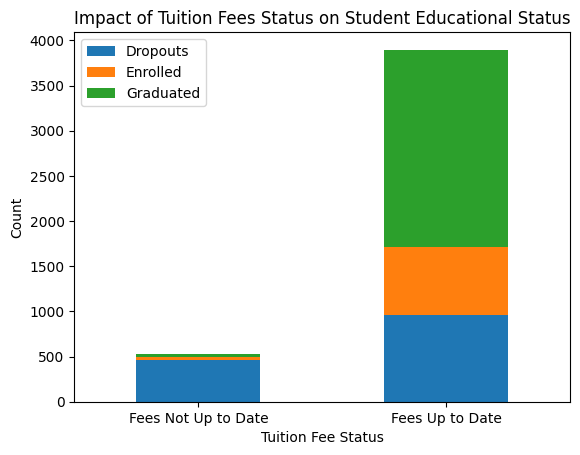

In [27]:
# Mapping numerical labels to descriptive labels for Tuition Fee status
tuition_fee_status_labels = {0: 'Fees Not Up to Date', 1: 'Fees Up to Date'}

# Visualizing the impact of tuition fees status on educational outcomes
grouped = df.groupby(['Tuition fees up to date', 'Student Status']).size().unstack()
grouped.rename(index=tuition_fee_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Tuition Fee Status')
plt.ylabel('Count')
plt.title('Impact of Tuition Fees Status on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

The graph suggests that students with outstanding tuition fees have an extremely higher likelihood of dropping out, making this factor a potent predictor of educational discontinuation.

**Impact of Age on Student Status**

Now, we investigate the impact of demographic factors, specifically age, on student academic status.

**Age Distribution Analysis**

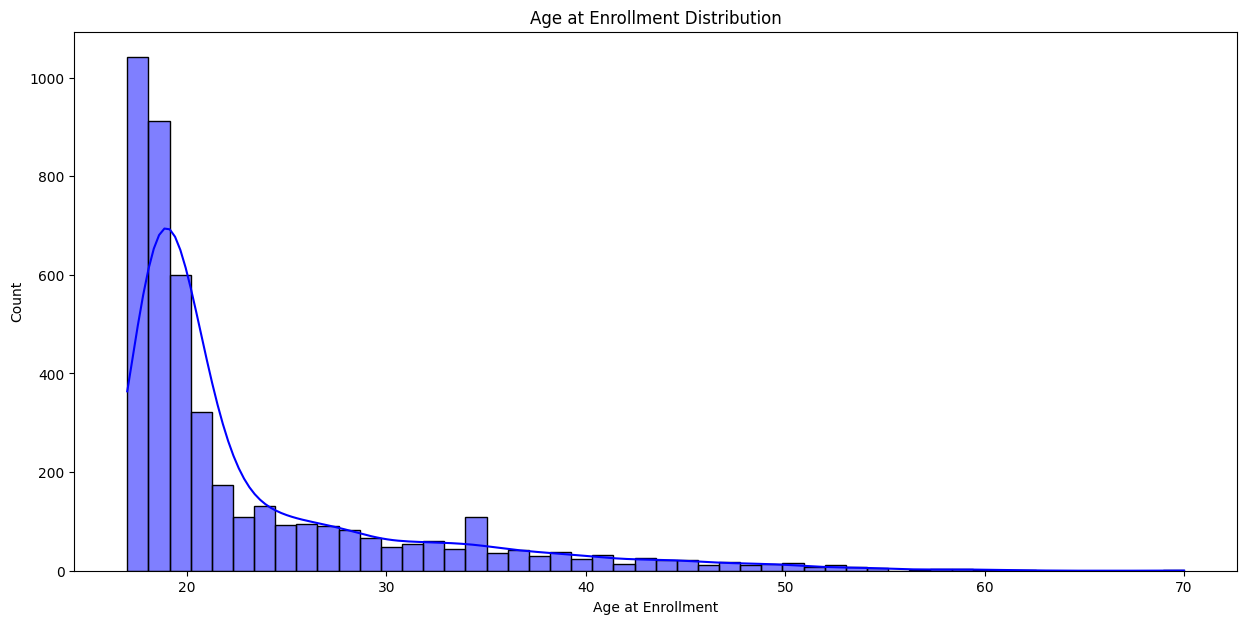

In [30]:
df['Age at enrollment'] = df['Age at enrollment'].replace([np.inf, -np.inf], np.nan)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15,7))
ax = sns.histplot(df['Age at enrollment'], bins=50, color='b', kde=True)
ax.set_title('Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
plt.show()

The histogram depicts that most students enrolling are between the ages of approximately 18 to 22, a skewed distribution is evident, highlighting a typical college-age demographic.

**Dynamics of Age in Student Outcomes**

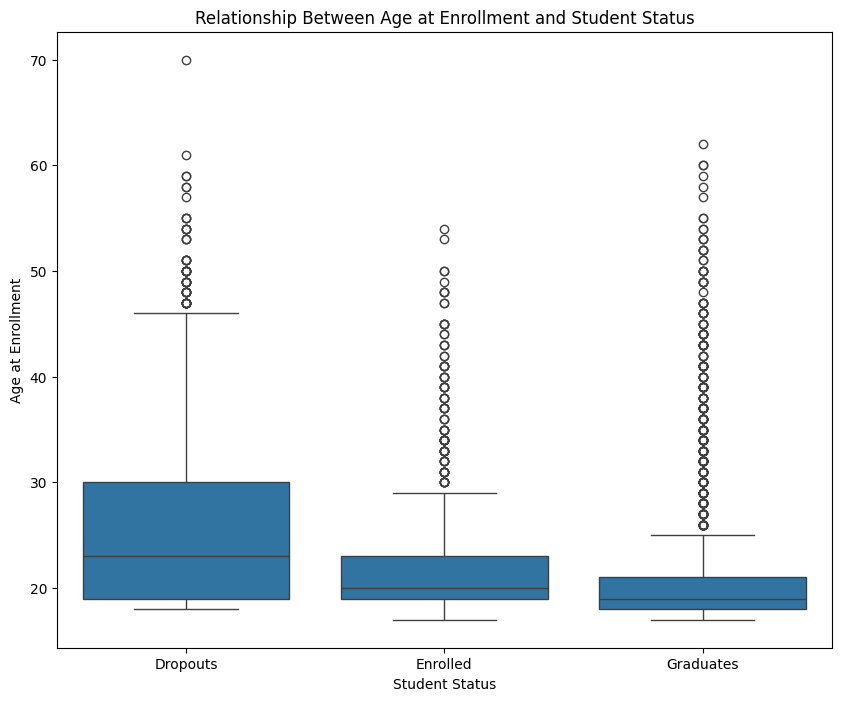

In [31]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Student Status', y='Age at enrollment', data=df)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Age at Enrollment')
plt.title('Relationship Between Age at Enrollment and Student Status')
plt.show()

The box plot showcases that graduates tend to be younger, with a narrower age range suggesting a more uniform path to completion. In contrast, dropouts have a wider age range, indicating that dropping out affects a broader demographic. Current students have ages closely aligned with graduates, implying consistent enrollment ages.

# Comprehensive Predictive Analysis for Student Status Determination

Now that we have conducted basic exploratory and statistical analysis, our objective now is to predict students' status  based on various input features. We want to predict whether a student will drop out of university or not, warranting a binary classification model for predicting.

**Importing Required Libraries**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
import time
from datetime import timedelta

**Re-engineering the Dataset**

We transform the Student Status column into a binary feature named 'dropout', merging 'Enrolled' and 'Graduate' statuses into the 'No Dropout' category.

In [36]:
new_df = df.copy()

# Transforming 'Student Status' into a binary 'dropout' feature
new_df['dropout'] = new_df['Student Status'].map(lambda x: 1 if x == 0 else 0)

# Dropping the original 'Student Status' to avoid confusion
new_df.drop(['Student Status'], axis=1, inplace=True)

X_new = new_df.drop('dropout', axis = 1)
y_new = new_df['dropout']

# Splitting the dataset into training and testing sets for the binary classification
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

**Model configurations with hyperparameters**

Starting search for: Gradient Boosting
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Gradient Boosting: 0.8443
Training Score for Gradient Boosting: 0.8632
Search completed for Gradient Boosting. Time taken: 0:03:26
Best parameters for Gradient Boosting: {'model__learning_rate': 0.047454011884736254, 'model__max_depth': 2, 'model__n_estimators': 114}


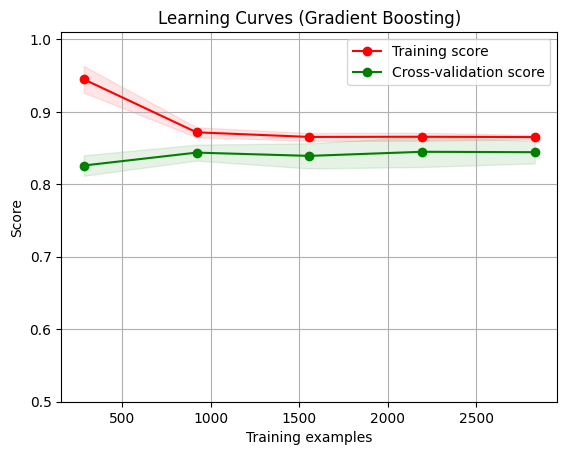

Starting search for: Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Random Forest: 0.8429
Training Score for Random Forest: 0.8663
Search completed for Random Forest. Time taken: 0:01:26
Best parameters for Random Forest: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 3, 'model__n_estimators': 199}


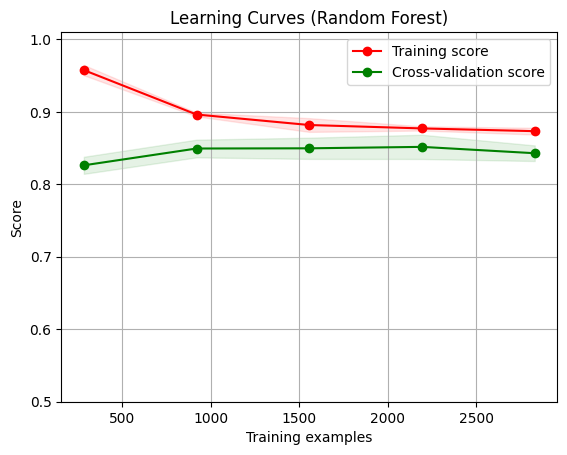

Starting search for: Logistic Regression
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Logistic Regression: 0.8406
Training Score for Logistic Regression: 0.8446
Search completed for Logistic Regression. Time taken: 0:00:08
Best parameters for Logistic Regression: {'model__C': 0.07058449429580245}


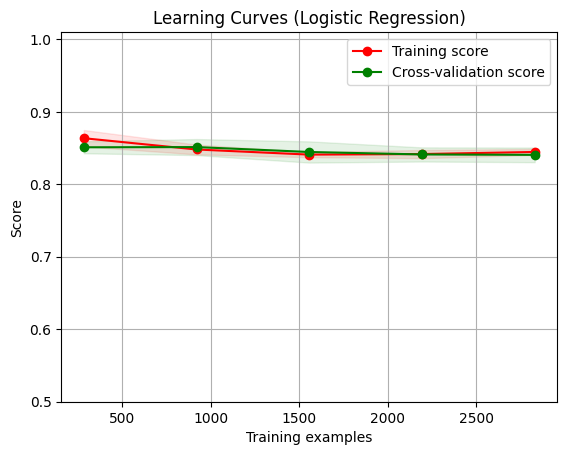

Starting search for: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for SVM: 0.8446
Training Score for SVM: 0.8805
Search completed for SVM. Time taken: 0:02:31
Best parameters for SVM: {'model__C': 1.749080237694725, 'model__kernel': 'rbf'}


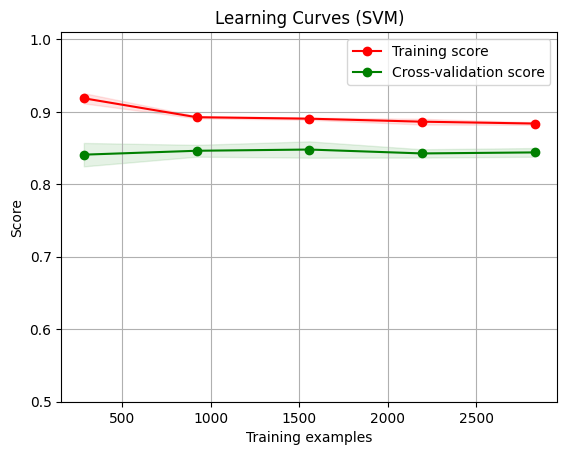

Starting search for: KNN
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for KNN: 0.8265
Training Score for KNN: 0.8553
Search completed for KNN. Time taken: 0:00:09
Best parameters for KNN: {'model__n_neighbors': 24, 'model__weights': 'uniform'}


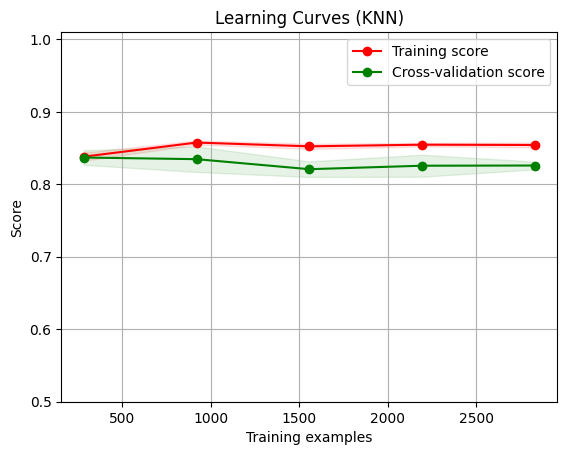

Total time for all model searches: 0:09:17


In [40]:
models_config_new = {
    'Gradient Boosting': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': randint(100, 150),
            'model__learning_rate': uniform(0.01, 0.1),
            'model__max_depth': randint(2, 4)
        }
    },
    'Random Forest': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': randint(100, 200),
            'model__max_depth': randint(3, 6),
            'model__min_samples_split': randint(3, 6),
            'model__min_samples_leaf': randint(2, 4)
        }
    },
    'Logistic Regression': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', LogisticRegression(random_state=42))
        ]),
        'params': {
            'model__C': uniform(0.05, 1)
        }
    },
    'SVM': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'model__C': uniform(1, 2),
            'model__kernel': ['rbf']
        }
    },
    'KNN': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', KNeighborsClassifier())
        ]),
        'params': {
            'model__n_neighbors': randint(20, 30),
            'model__weights': ['uniform', 'distance']
        }
    }
}

# Configuring learning curves to identify if the models are underfitting or overfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

best_models_binary = {}
start_time_new = time.time()

# New RandomizedSearchCV
for name, config in models_config_new.items():
    print(f"Starting search for: {name}")
    search_start_time_new = time.time()

    search = RandomizedSearchCV(config['pipeline'], config['params'], n_iter=12, cv=5, scoring='accuracy', random_state=42, verbose=1)
    search.fit(X_train_new, y_train_new)

    best_models_binary[name] = search.best_estimator_
    print(f"Test score for {name}: {search.best_score_:.4f}")

    # Comparing training set performance to the best CV score
    training_score = search.score(X_train_new, y_train_new)
    print(f"Training Score for {name}: {training_score:.4f}")

    elapsed_time_new = int(time.time() - search_start_time_new)
    print(f"Search completed for {name}. Time taken: {str(timedelta(seconds=elapsed_time_new))}")

    # Displaying the best parameters for the current model
    print(f"Best parameters for {name}: {search.best_params_}")

    # Plotting the learning curve for the best estimator
    plot_learning_curve(search.best_estimator_, f"Learning Curves ({name})", X_train_new, y_train_new, ylim=(0.5, 1.01), cv=5, n_jobs=4)

overall_time_new = int(time.time() - start_time_new)
print(f"Total time for all model searches: {str(timedelta(seconds=overall_time_new))}")

**Ensemble Modeling for Binary Classification**

To further enhance prediction accuracy, we aggregate the best-performing models into an ensemble using a VotingClassifier with soft voting. This method combines the predictive strengths of individual models, aiming to improve overall performance and robustness in identifying potential dropouts.

In [41]:
from sklearn.ensemble import VotingClassifier

# Creating an ensemble of the best models
ensemble_binary = VotingClassifier(
    estimators=[(name, model) for name, model in best_models_binary.items()],
    voting='soft'
)
ensemble_binary.fit(X_train_new, y_train_new)

VotingClassifier(estimators=[('Gradient Boosting',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               GradientBoostingClassifier(learning_rate=0.047454011884736254,
                                                                          max_depth=2,
                                                                          n_estimators=114,
                                                                          random_state=42))])),
                             ('Random Forest',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMO...
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               SVC(C=1.749080237694725,
                                                   probability=True,
                                                   random_state=42))])),
                             ('KNN',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=24))]))],
                 voting='soft')

**Model Evaluation**

Ensemble Model Accuracy: 0.8475


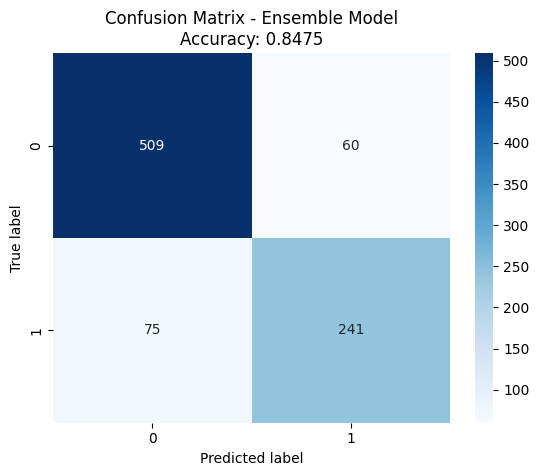

              precision    recall  f1-score   support

     Dropout       0.87      0.89      0.88       569
  No Dropout       0.80      0.76      0.78       316

    accuracy                           0.85       885
   macro avg       0.84      0.83      0.83       885
weighted avg       0.85      0.85      0.85       885



In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_binary = ensemble_binary.predict(X_test_new)

# Accuracy
accuracy_binary = accuracy_score(y_test_new, y_pred_binary)
print(f"Ensemble Model Accuracy: {accuracy_binary:.4f}")

# Confusion Matrix
conf_matrix_ensemble_binary = confusion_matrix(y_test_new, y_pred_binary)
sns.heatmap(conf_matrix_ensemble_binary, annot=True, fmt="d", cmap='Blues')
plt.title(f"Confusion Matrix - Ensemble Model\nAccuracy: {accuracy_binary:.4f}")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Classification Report
print(classification_report(y_test_new, y_pred_binary, target_names=['Dropout', 'No Dropout']))

Thus, with an ensemble model, we get a predictive accuracy of 87% which is a great score considering the spread of the data and the number of features involved in training the model.

We can now use this model to make predictions about new student data to make informed policy and intervention decisions.

In [46]:
pred_df = df.copy()

# Dropping the 'Student Status' column
pred_df.drop(['Student Status'], axis=1, inplace=True)

X_pred = new_df.drop('dropout', axis = 1)

y_pred = ensemble_binary.predict(X_pred)

In [47]:
print(y_pred)

[1 0 1 ... 0 0 0]


In [69]:
original_statuses = df['Student Status'].map(lambda x: 1 if x == 0 else 0)

pred_accuracy = (original_statuses == y_pred)
pred_accuracy.head()

pred_accuracy = pred_accuracy.map(lambda x: 1 if x == True else 0)


accuracy_percentage = pred_accuracy.sum() / pred_accuracy.count()
print(accuracy_percentage)

0.8684448462929476


For the lack of a new dataset, I have used the same dataset as the argument to the prediction model, and we can see that the model is able to predict the correct values with 86.84% accuracy.